# **WHO LIFE EXPECTANCY**

The objective  is to use an example of WHO life expectancy data 
Hence,for instance, we get data from the WHO Organization. In particular, we can figure out that its a expectancy. Therefore, it is a prediction problem.


**Brief description of the data set I chose and a summary of its attributes.**

The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.




*   Country
*   Year
*   Developed or Developing status
*   Life Expectancy in age
*   Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
*   Number of Infant Deaths per 1000 population
*   Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
*   Expenditure on health as a percentage of Gross Domestic Product per capita(%)
*   Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
*   Measles - number of reported cases per 1000 population
*   Average Body Mass Index of entire population
*   Number of under-five deaths per 1000 population
*   Polio (Pol3) immunization coverage among 1-year-olds (%)
*   General government expenditure on health as a percentage of total government expenditure (%)
*   Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
*   Deaths per 1 000 live births HIV/AIDS (0-4 years)
*   Gross Domestic Product per capita (in USD)
*   Population of the country
*   Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
*   Prevalence of thinness among children for Age 5 to 9(%)
*   Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
*   Number of years of Schooling(years)



























**Brief summary of data exploration and actions taken for data cleaning and feature engineering.**

Loading data file

In [7]:
import pandas as pd
import seaborn as sns
sns.set()
datafile = "/content/Life Expectancy Data.csv"
df = pd.read_csv(datafile)


to know how many are non null

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [9]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

we can see that Life expectancy ,Adult Mortality,Alcohol,Hepatitis B,BMI,Polio,Total expenditure,Diphtheria,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling have some null values.we dont want our life expectancy to be null as we are predicting it now so we drop null values

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

now we have non null values so we can proceed now!

In [12]:
df.head(15)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,116,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [13]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [14]:
import seaborn as sns
sns.set_context('notebook')

In [ ]:
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

I think its too small to see them clearly there are many features ............

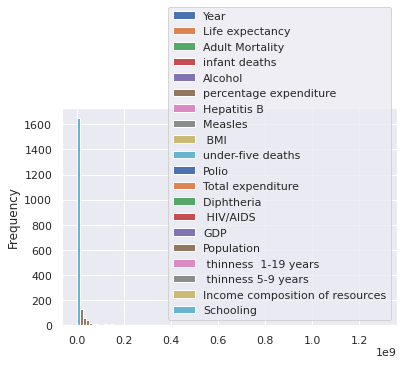

In [15]:
df.plot.hist(bins=100)

Plot to know the correlation between country and alcohol

the main objective is to know which country takes more alcohol



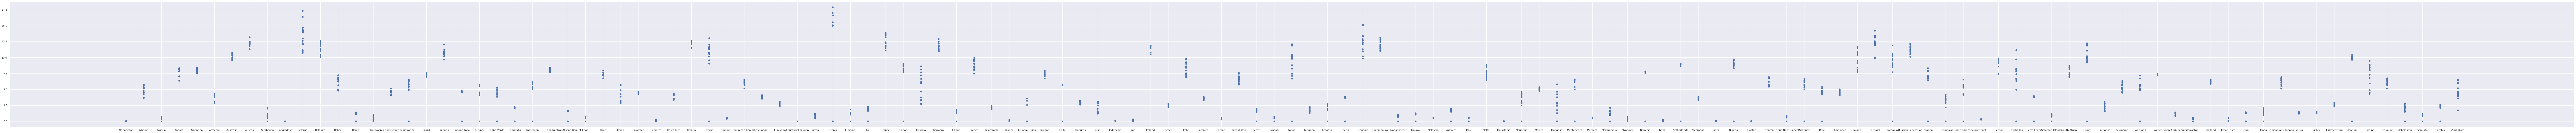

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(200,10))
plt.scatter(df['Country'].values, df['Alcohol'])

looks like belarus,estonia,lithuania etc.. are taking more consumption of alcohol

Plot to know the correlation between country and life expectancy



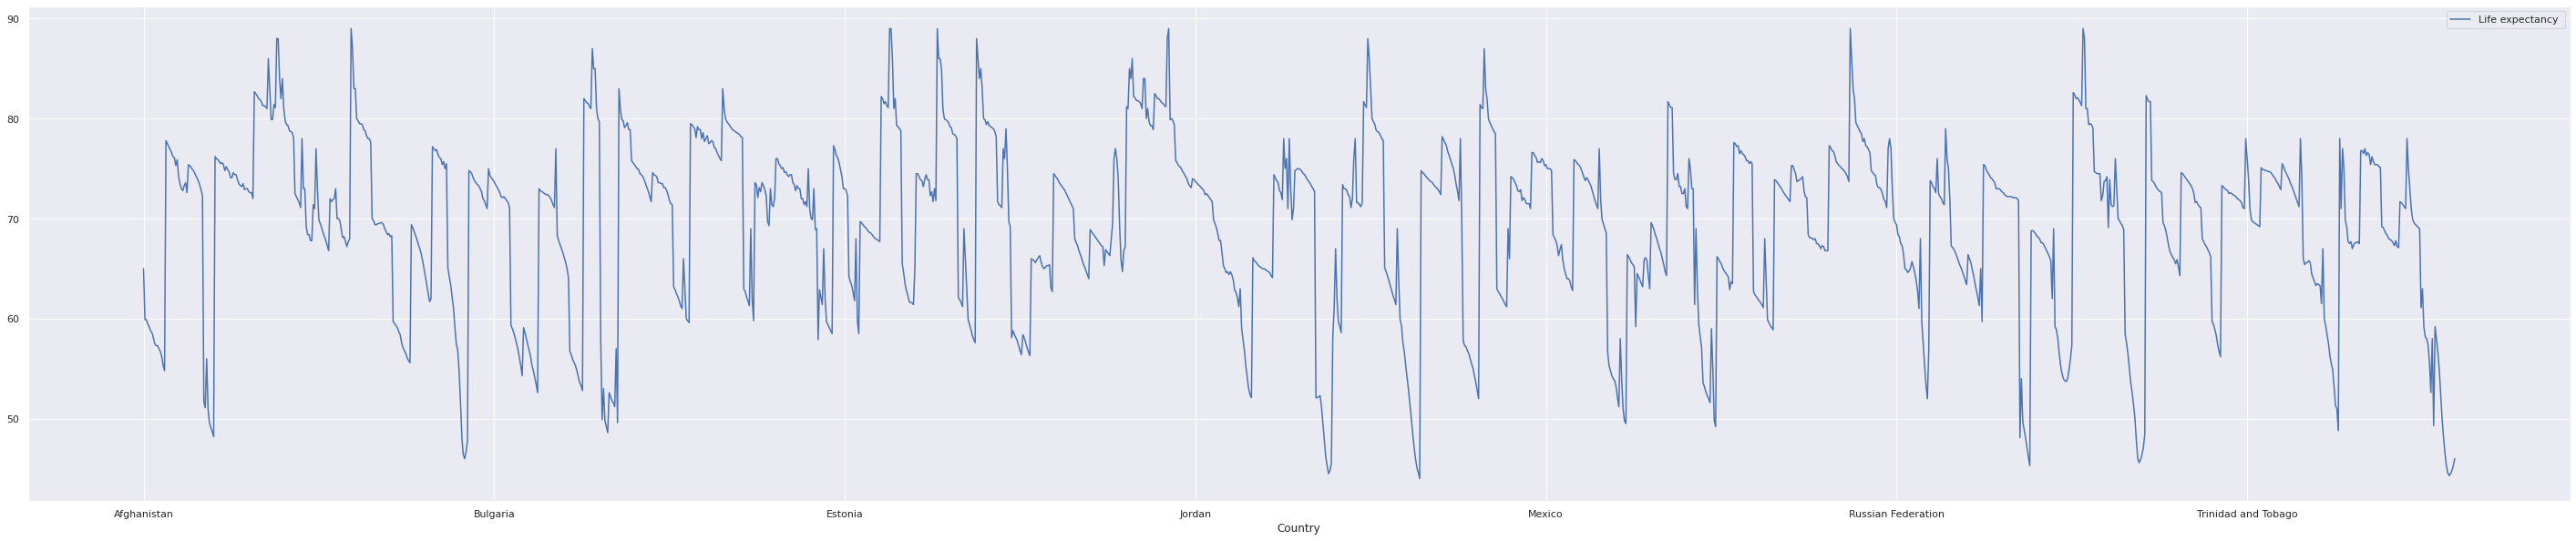

In [61]:
df.plot(kind='line', x='Country', y='Life expectancy ',figsize=(50,10))

looks like we have to add year and some other feature like status etc..

Plot to know the correlation between country and life expectancy
having a clear analysis with year and alcohol added

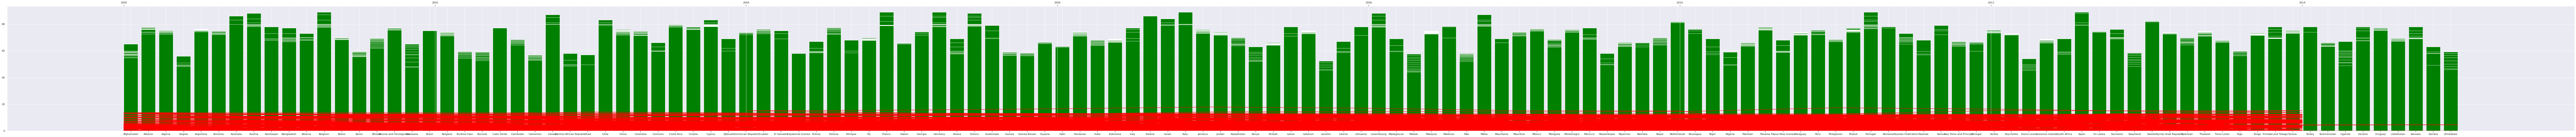

In [64]:
plt.figure(figsize=(200,10))
ax1 = plt.gca()
ax2 = ax1.twiny()
ax1.bar(df['Country'],df['Life expectancy '],color='green')
ax2.plot(df['Year'],df['Alcohol'],color='red')

Plot to know the correlation between country and life expectancy
having a clear analysis with year and BMI added

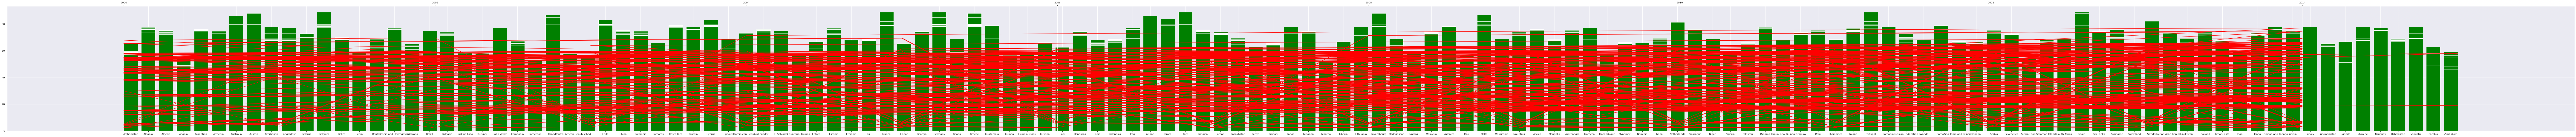

In [67]:
plt.figure(figsize=(200,10))
ax1 = plt.gca()
ax2 = ax1.twiny()
ax1.bar(df['Country'],df['Life expectancy '],color='green')
ax2.plot(df['Year'],df[' BMI '],color='red')

Plot to know the correlation between country and life expectancy
having a clear analysis with year and status added

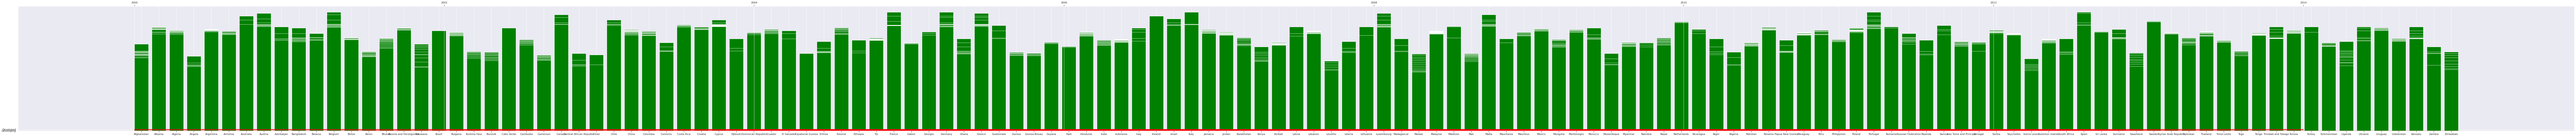

In [68]:
plt.figure(figsize=(200,10))
ax1 = plt.gca()
ax2 = ax1.twiny()
ax1.bar(df['Country'],df['Life expectancy '],color='green')
ax2.plot(df['Year'],df['Status'],color='red')

Plot to know the correlation between country and life expectancy
having a clear analysis with year and polio added

In [69]:
plt.figure(figsize=(200,10))
ax1 = plt.gca()
ax2 = ax1.twiny()
ax1.bar(df['Country'],df['Life expectancy '],color='green')
ax2.plot(df['Year'],df['Polio'],color='red')

Output hidden; open in https://colab.research.google.com to view.

**Linear Regression**

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 38.,  57., 100., 126., 210., 229., 526., 234., 100.,  29.]),
 array([44. , 48.5, 53. , 57.5, 62. , 66.5, 71. , 75.5, 80. , 84.5, 89. ]),
 <a list of 10 Patch objects>)

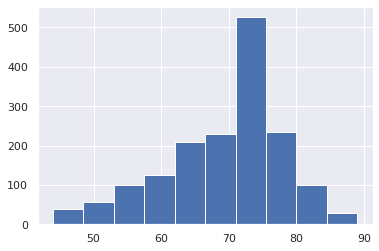

In [17]:
plt.hist(df['Life expectancy '])

In [18]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
normaltest(df['Life expectancy '].values)


NormaltestResult(statistic=93.1464769584523, pvalue=5.9360769772633565e-21)

p-value extremely low. Our y variable we've been dealing with this whole time was not normally distributed!

lets try to normalize through boxcox transformation 

**BoxCox transformation**

In [19]:
df1=df
df1.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [20]:
df1['Life expectancy ']

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 1649, dtype: float64

to make sure there are no values which are like out of range (should not be equal to or less than zero for boxcox)

In [21]:
(df1['Life expectancy ']<=0).any()

False

In [22]:
df1=df1[df1['Life expectancy ']!=0]

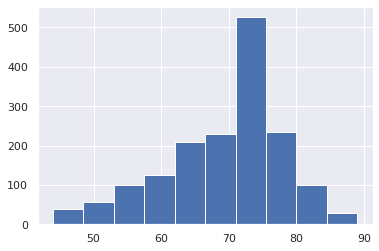

In [23]:
df1['Life expectancy '].hist()

In [24]:
from scipy.stats import boxcox
bc_result = boxcox(df1['Life expectancy '])
boxcox_le = bc_result[0]
lam = bc_result[1]

(array([ 81., 153., 158., 274., 278., 406., 170.,  94.,  19.,  16.]),
 array([13051.4401899 , 20957.27522461, 28863.11025932, 36768.94529403,
        44674.78032874, 52580.61536345, 60486.45039816, 68392.28543287,
        76298.12046758, 84203.95550229, 92109.790537  ]),
 <a list of 10 Patch objects>)

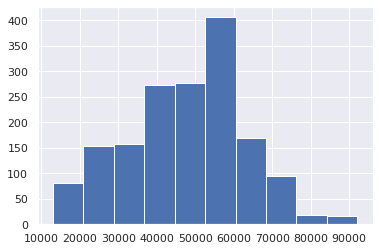

In [25]:
plt.hist(boxcox_le)

In [26]:
normaltest(boxcox_le)

NormaltestResult(statistic=6.707991955734533, pvalue=0.034944437536298695)

now we have normalised one after doing box cox transformation as p value hasn't having e power negative something which was too small compared to the new p value 0.034944437536298695

**Dummies**

to get rid of strings in case like dtype is object 

In [52]:
mask=df.dtypes==np.object
object_cols=df.columns[mask]
num_object_cols=(df[object_cols].apply(lambda x: x.nunique()).sort_values(ascending=False))

number of columns which are actually objects

In [29]:
print(num_object_cols)

Country    133
Status       2
dtype: int64


In [30]:
dfg=pd.get_dummies(df,prefix=['Country'],columns=['Country'])

In [25]:
dfg

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bangladesh,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_Bulgaria,...,Country_Panama,Country_Papua New Guinea,Country_Paraguay,Country_Peru,Country_Philippines,Country_Poland,Country_Portugal,Country_Romania,Country_Russian Federation,Country_Rwanda,Country_Samoa,Country_Sao Tome and Principe,Country_Senegal,Country_Serbia,Country_Seychelles,Country_Sierra Leone,Country_Solomon Islands,Country_South Africa,Country_Spain,Country_Sri Lanka,Country_Suriname,Country_Swaziland,Country_Sweden,Country_Syrian Arab Republic,Country_Tajikistan,Country_Thailand,Country_Timor-Leste,Country_Togo,Country_Tonga,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Zambia,Country_Zimbabwe
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2934,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2935,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2936,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Now that we have a normally distributed y-variable, let's try a regression!

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import KFold,cross_val_predict
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import Pipeline

In [32]:
x=dfg
x=dfg.drop('Status',axis=1)
y=boxcox_le

**TRAIN TEST SPLIT MODEL**

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [34]:
lr=LinearRegression()
s=StandardScaler()
x_train_s=s.fit_transform(x_train)
x_test_s=s.fit_transform(x_test)

In [35]:
lr.fit(x_train_s,y_train)

LinearRegression()

In [36]:
y_predict=lr.predict(x_test_s)

In [37]:
lr_mse= mean_squared_error(y_test,y_predict)
lr_rmse=np.sqrt(lr_mse)
lr_rmse

1951.3029376185264

**Linear regression rmse 1951.3029376185264**

In [38]:
lasso=Lasso(alpha=0.01,max_iter=1000000)

In [39]:
lasso.fit(x_train_s,y_train)
y_predict__ls=lasso.predict(x_test_s)
lasso_mse= mean_squared_error(y_test,y_predict__ls)
lasso_rmse=np.sqrt(lasso_mse)
lasso_rmse

1957.5214446465252

**Lasso regression rmse 1957.5214446465252**

In [40]:
ridge=Ridge(alpha=0.01,max_iter=1000000)

In [41]:
ridge.fit(x_train_s,y_train)
y_predict__rr=ridge.predict(x_test_s)
ridge_mse= mean_squared_error(y_test,y_predict__rr)
ridge_rmse=np.sqrt(ridge_mse)
ridge_rmse

1951.5939382388763

**Ridge Regression rmse 1951.5939382388763**

**linear regression which is simpler.... seems to be the best model relatively
without polynomial features or regularization added**

**Let's add polynomial features**

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
pf=PolynomialFeatures(degree=2)
x_poly=pf.fit_transform(x)

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x_poly,y,test_size=0.3,random_state=42)
s=StandardScaler()
x_train_s = s.fit_transform(x_train)
lr=LinearRegression()
lr.fit(x_train_s,y_train)
x_test_s=s.transform(x_test)
y_pred=lr.predict(x_test_s)


In [51]:
lrpoly_mse= mean_squared_error(y_test,y_pred)
lrpoly_rmse=np.sqrt(lrpoly_mse)
lrpoly_rmse

1451.7524241880487

**rmse decreased I think that this polynomial feature model could work better. so lets regularize**

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
x_train,x_test,y_train,y_test = train_test_split(x_poly,y,test_size=0.3,random_state=42)
s=StandardScaler()
x_train_s = s.fit_transform(x_train)
x_test_s=s.transform(x_test)
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10]
ridgeCV = RidgeCV(alphas=alphas,
 cv=4).fit(x_train_s, y_train)
ridgeCV_mse= mean_squared_error(y_test,ridgeCV.predict(x_test_s))
ridgeCV_rmse=np.sqrt(ridge_mse)
print(ridgeCV.alpha_, ridgeCV_rmse)


0.005 1951.5939382388763


In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
alphasls = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10,15,20,40,90]
lassoCV = LassoCV(alphas=alphasls,max_iter=1e4,
 cv=4).fit(x_train_s, y_train)
lassoCV_mse= mean_squared_error(y_test,lassoCV.predict(x_test_s))
lassoCV_rmse=np.sqrt(lasso_mse)
print(lassoCV.alpha_, lassoCV_rmse)

10.0 1957.5214446465252


**oops! regularization did not work as expected sometimes it may not be inline with polynomial features like we may have a more complex model by increasing degree and then regularization may help**

# **Conclusions**



*   alcohol ,Measles ,Hepatitis B, BMI ,under five deaths etc...  impacts model more than non requirement feature like status which isnt that related to life expectancy, so it was dropped
*   among Linear,Lasso,Ridge Regressions Linear the simplest model turned out to be effective without regularizations and polynomial features
*   Adding Polynomial Features made it even a better model 
*   But we have seen for the degree 2 which is less complex compared to degree 4,5................regularization didnt work better ..... sometimes model can be more complex and regularization may work then.... Here it seemed to be not required




